# Linear Model Used Car Price Predictor 
**Due: Wednesday, 09/27/2022, 2:15 PM**

Welcome to your second assignment! You will train a linear model to predict used cars' prices based on their ages.


Exercises:
1. $\color{violet}{\textbf{(10\%) Data Visualization}}$
2. $\color{violet}{\textbf{(10\%) Create a Linear Model}}$
3. $\color{violet}{\textbf{(10\%) Calculate Mean Square Error}}$
4. $\color{violet}{\textbf{(60\%) Gradient Descent Optimization}}$
5. $\color{violet}{\textbf{(10\%) Test Model with New Data}}$


**Instructions:**
- Write your code only between the $\color{green}{\textbf{\small \#\#\# START CODE HERE \#\#\#}}$ and $\color{green}{\textbf{\small \#\#\# END CODE HERE \#\#\#}}$ commented lines. $\color{red}{\textbf{Do not modify code out of the designated area.}}$
- Reference answers are provided after a certain coding blocks. Be aware if your answer is different from the reference..
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.

**After this assignment you will:**

- Be able to train a neural network model with the simplest form: single-in, single-out linear function.
    - Initialize weight and bias parameters.
    - Use a loss function to evaluate the model's performance.
    - Optimize the weight and bias parameters using gradient descent algorithm.
- Get more used to vectorization using NumPy.

## 1 - Load the Data ##
The objective is to predict a car's price given its age. And we need data to build such a predictor (model). First, let's load the data and plot a figure to roughly observe the relationship between ages and prices of the cars.
#### $\color{violet}{\textbf{(10\%) Exercise 1: Data Visualization}}$
**Note: Do not connect datapoints with lines.**


There are 268577 samples in the data.


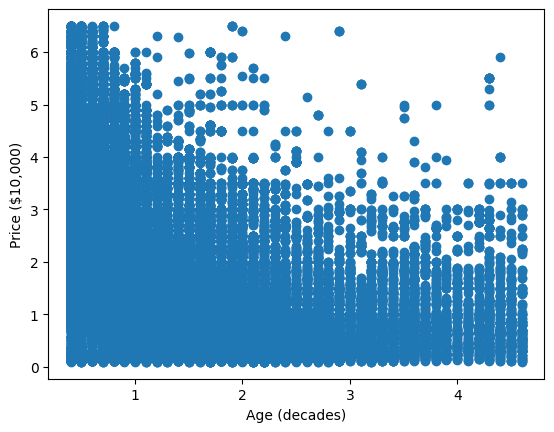

In [32]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data (year, price)
X_train = np.load("years_train.npy") / 10  # rescale to per decade
y_train = np.load("prices_train.npy") / 1e4  # rescale to per $10,000
print(f"There are {X_train.shape[0]} samples in the data.")

# Visualize the data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
### START CODE HERE ### (≈ 1 line of code)
 
### END CODE HERE ###


## 2 - Create a Model
Create a linear model: $\hat{y} = wx + b$ govern by the weight parameter, $w$ and bias parameter, $b$. The independent variable, $x$ indicates the age of a car, and the dependent variable $\hat{y}$ is the predicted price of the car.
#### $\color{violet}{\textbf{(10\%) Exercise 2: Create a Linear Model}}$


In [33]:
def forward(w, b, x):
    """
    Linear model function
        Args:
            w: weight parameter, a scalar
            b: bias parameter, a scalar
            x: independent variable, a 1-D numpy array
        Returns:
            yhat: dependent variable, a 1-D numpy array
    """
    ### START CODE HERE ### (≈ 1 line of code)
    yhat = None
    ### END CODE HERE ###
    return yhat

# Sanity check
print(f"The model's output from 4 input values: {forward(2, -3, np.linspace(-0.2, 0.2, 4))}")

The model's output from 4 input values: [-3.4        -3.13333333 -2.86666667 -2.6       ]


**Expected Output**:
>
```console
The model's output from 4 input values: [-3.4        -3.13333333 -2.86666667 -2.6       ]
```

To initialize the model, we need to initialize $w$ and $b$. It is very common in deep learning to initialize the parameters to small values. And we can visualize the initial model after that.

w0=3.684559810524488e-05, b0=-0.0001387826445218712


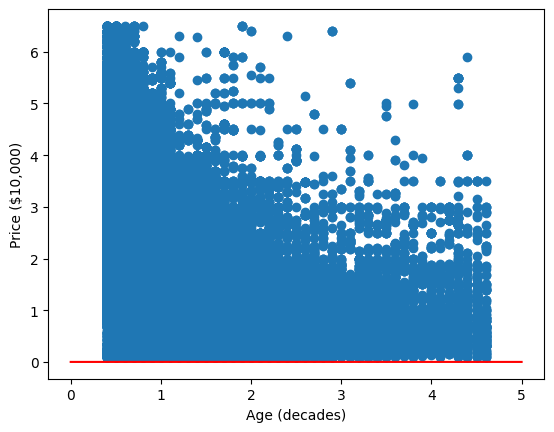

In [34]:
np.random.seed(3321)
# Initialize model
w = np.random.normal(loc=0, scale=1e-4)
b = np.random.normal(loc=0, scale=1e-4)
print(f"w0={w}, b0={b}")
# Visualize the model
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_train, y_train, 'o')
plt.plot([0, 5], forward(w, b, np.array([0, 5])), 'r')


## 3 - Evaluate the Model
We need a criteria to evaluate the performance of the model. Mean square error function: $\mathcal{L}(\hat{y}, y) = \frac{1}{2M}\Sigma_{i=1}^M(\hat{y}_i - y_i)^2$ is usually applied to calculate the averaged error between the model predicted values and data originated values. $M$ is the total number of datapoints, $\hat{y}$ is the model predicted value, $y$ is the data originate value (true value), $i$ is the index of a certain datapoint.

#### $\color{violet}{\textbf{(10\%) Exercise 3: Calculate Mean Square Error}}$


In [35]:
def mse_loss(pred, true):
    """
    Mean square error (MSE) function
        Args:
            pred: model predicted value, a 1-D numpy array
            true: true value, a 1-D numpy array
        Returns:
            loss_value: averaged MSE error, a scalar
    """
    ### START CODE HERE ### (≈ 1 line of code)
    loss_value = None
    ### END CODE HERE ###
    return loss_value

# Sanity check
print(f"Model's MSE loss: {mse_loss(pred=forward(w, b, X_train), true=y_train)}")

Model's MSE loss: 2.1660192668556335


**Expected Output**:
>
```console
Model's MSE loss: 2.1660192668556335
```

## 4 - Gradient Descent Optimization
We need to calculate the gradient of the loss function $\mathcal{L}$ (derivatives with respect to $w$ and $b$). The purpose of doing so is to determine directions that increment $w$ and $b$ to reduce the MSE loss of the model. The gradient of the loss function can be computed as:

$\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{M}\Sigma_{i=1}^M(\hat{y}_i - y_i)x_i$

$\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\Sigma_{i=1}^M(\hat{y}_i - y_i)$

To optimize $w$ and $b$, we need to perform gradient descent algorithm:

$\textbf{Initialize } w, b$

$\text{\textbf{Repeat} until converge } \{$

&nbsp; &nbsp; &nbsp; &nbsp; $\text{compute } \frac{\partial \mathcal{L}}{\partial w} \text{, and } \frac{\partial \mathcal{L}}{\partial b}$

&nbsp; &nbsp; &nbsp; &nbsp; $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$

&nbsp; &nbsp; &nbsp; &nbsp; $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$

$\}$

where $\alpha$ is the learning rate (step size).

#### $\color{violet}{\textbf{(60\%) Exercise 4: Gradient Descent Optimization}}$
Please complete the following two tasks in the next code block.
1. Define a function to compute gradient ($\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$)
2. Use a iterative loop to update $w$ and $b$. **Please store model loss in each iteration to a list/array.**

You can replace `None`s with appropriate variables or operations.


loss @ 1 iteration: 2.1660192668556335
loss @ 2 iteration: 1.8007983012311186
loss @ 3 iteration: 1.5566017862750967
loss @ 4 iteration: 1.3917450987126982
loss @ 5 iteration: 1.2789427916475404
loss @ 6 iteration: 1.2003336096839574
loss @ 7 iteration: 1.144224412077926
loss @ 8 iteration: 1.1029591029799763
loss @ 9 iteration: 1.0715238669168325
loss @ 10 iteration: 1.0466343082781189
loss @ 11 iteration: 1.0261379919028806
loss @ 12 iteration: 1.0086234103825227
loss @ 13 iteration: 0.9931640555030627
loss @ 14 iteration: 0.979150913956725
loss @ 15 iteration: 0.9661828358428497
loss @ 16 iteration: 0.9539947803379847
loss @ 17 iteration: 0.9424108516131712
loss @ 18 iteration: 0.9313135597459605
loss @ 19 iteration: 0.9206237007594213
loss @ 20 iteration: 0.9102871868062298
loss @ 21 iteration: 0.9002664251871977
loss @ 22 iteration: 0.8905346745709565
loss @ 23 iteration: 0.8810723497965761
loss @ 24 iteration: 0.8718646020385022
loss @ 25 iteration: 0.8628997337171737
loss @ 26 i

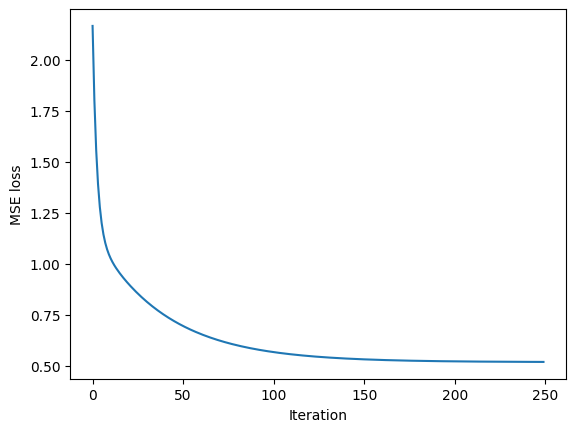

In [36]:
def grad(x, y, yhat):
    """
    Compute gradient of loss function
        Args:
            x: independent variables, a 1-D numpy array
            y: true value, a 1-D numpy array
            yhat: model predicted value, a 1-D numpy array
        Returns:
            dw: dL/dw, a scalar
            db: dL/db, a scalar
    """
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = None  # dL/dw
    db = None  # dL/db
    ### END CODE HERE ###

    return dw, db

# Optimization
### START CODE HERE ### (≈ 7 lines of code)
num_iters = None
learning_rate = None
losses = []  # storage for loss at each iteration
for i in range(num_iters):
    pred = None
    dw, db = None
    w = None
    b = None
    loss = None
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")  # uncomment this line if need to debug
    losses.append(loss)
### END CODE HERE ###

# To visualize changing of the loss
plt.xlabel("Iteration")
plt.ylabel("MSE loss")
plt.plot(losses)


## 5 - Test the Model
The model was trained in the previous steps. Now, let's test the model with a new set of data.

#### $\color{violet}{\textbf{(10\%) Exercise 5: Test Model with New Data}}$


There are 29842 samples in the test dataset.
MSE prediction error on test data: 0.5249342705303754


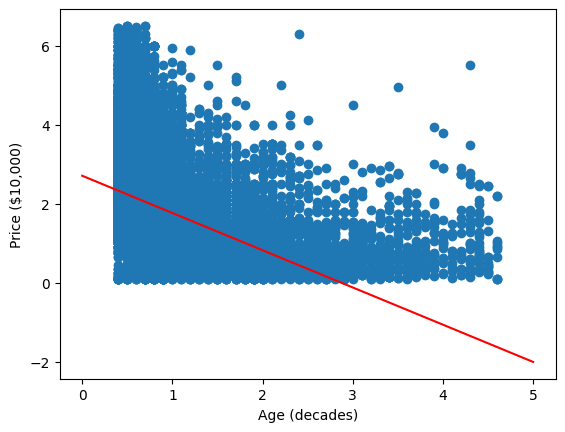

In [37]:
# Load test data
X_test = np.load("years_test.npy") / 10  # rescale to per decade
y_test = np.load("prices_test.npy") / 1e4  # rescale to per $10,000
print(f"There are {X_test.shape[0]} samples in the test dataset.")

# You'll need to calculate mse loss of the model on the test data
### START CODE HERE ### (≈ 2 lines of code)
pred_test = None
loss_test = None
### END CODE HERE ###
print(f"MSE prediction error on test data: {loss_test}")

# To visualize the model for how it fits to the test data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_test, y_test, 'o')
plt.plot([0, 5], forward(w, b, np.array([0, 5])), 'r')

You may observe that the model did somehow catch the relationship between ages and prices of the cars. However, it does not make sense to predict negative price for the cars older than 3 decades. We'll investigate approaches to avoid this in the future.  

# Congratulations! You have finished this assignment!